In [1]:
# import computational packages
import numpy as np 
import pandas as pd
from scipy.stats import chi2, nbinom

# plotting
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white');
%config InlineBackend.figure_format='retina'

In [2]:
# read in guide gene pairs
guide_gene_pairs = pd.read_csv('./../results/baseline_guide_gene_pairs.csv')
guide_gene_pairs.head()

,gRNA_group,spacer_sequence,start,end,chrom,proximal_genes,gRNAgroup.chr,gRNAgroup.start,gRNAgroup.stop,gRNAgroup
0,SH3BGRL3_TSS,AAACCGCTCCCGAGCACGGG,26606551.0,26606569.0,chr1,ENSG00000130695,chr1,26605667,26605668,SH3BGRL3_TSS
1,SH3BGRL3_TSS,AAACCGCTCCCGAGCACGGG,26606551.0,26606569.0,chr1,ENSG00000142669,chr1,26605667,26605668,SH3BGRL3_TSS
2,SH3BGRL3_TSS,AAACCGCTCCCGAGCACGGG,26606551.0,26606569.0,chr1,ENSG00000158062,chr1,26605667,26605668,SH3BGRL3_TSS
3,SH3BGRL3_TSS,AAACCGCTCCCGAGCACGGG,26606551.0,26606569.0,chr1,ENSG00000169442,chr1,26605667,26605668,SH3BGRL3_TSS
4,SH3BGRL3_TSS,AAACCGCTCCCGAGCACGGG,26606551.0,26606569.0,chr1,ENSG00000176092,chr1,26605667,26605668,SH3BGRL3_TSS


In [3]:
# get shape of guide gene pairs
guide_gene_pairs.shape

(21934, 10)

In [4]:
# read in output file
line_count = 0
output_lines = []
with open('./../scripts/single_guide_gene_baseline_out.txt') as file:
    for line in file:
        if line_count % 2 == 0:
            output_lines.append(line.split(','))
        line_count += 1

In [5]:
# read in function outputs 
colnames = ['gene', 'spacer', 'null_0', 'null_disp', 'null_s', 'null_m',
            'null_fun', 'alt_0', 'alt_1', 'alt_disp', 'alt_s', 'alt_m', 'alt_fun']
glm_df = pd.DataFrame(output_lines, columns=colnames)
glm_df['null_fun'] = glm_df['null_fun'].astype(np.float64)
glm_df['alt_fun'] = glm_df['alt_fun'].astype(np.float64)
glm_df.head()

,gene,spacer,null_0,null_disp,null_s,null_m,null_fun,alt_0,alt_1,alt_disp,alt_s,alt_m,alt_fun
0,ENSG00000039123,AGAGCTCTCGGCTGTGCAGG,11.6223859033907,2.523020957182614,0.473376999169171,0.33900979633437806,191617.187629,11.622549630954929,-0.05548774253849045,2.5231038067613314,0.47331235675303795,0.3390004021477713,191616.743466
1,ENSG00000067248,AGAGCTCTCGGCTGTGCAGG,12.375573236641618,2.588497218892676,-0.33499500138907157,0.1608990971128073,277751.321623,12.377601095628101,-1.1074195673565608,2.6034383820721914,-0.33563114010753425,0.16083753405122708,277565.309621
2,ENSG00000152669,GAGAGCTCTTCACATTCCCG,7.631245825039638,0.5586404526519568,2.329062394809816,-2.279435951398584,12479.664362,7.632711437348755,-0.24667387745884972,0.5587908439738386,2.387831327830088,-2.2518674187298,12478.974839
3,ENSG00000039123,GAGAGCTCTTCACATTCCCG,11.622388513368119,2.523105677146199,0.4733975113247155,0.3390398811427556,191617.187630,11.624017281727411,-0.6344763256779973,2.5304879015603974,0.47270267977453384,0.33879240959060575,191570.161975
4,ENSG00000067248,GAGAGCTCTTCACATTCCCG,12.375568072886574,2.5885203086686577,-0.335016204352438,0.16091525857730915,277751.321626,12.378121920093367,-1.284541060091506,2.608863015406293,-0.336077108333776,0.16049011813094133,277488.523302


In [6]:
glm_df.shape

(21934, 13)

In [7]:
# calculate p values
def run_likelihood_ratio_test(row):
    '''helper function to run likelihood test'''
    
    # negate function outputs to get null and alternative likelihood
    null_likelihood = -1 * row['null_fun']
    alt_likelihood = -1 * row['alt_fun']
    
    # calculate test statistic and p-value
    ts = -2 * (null_likelihood - alt_likelihood)
    pval = 1 - chi2.cdf(ts, 1)
    
    # return p-value
    return pval

p_values = glm_df.apply(run_likelihood_ratio_test, axis=1)
p_values

0        0.345932
1        0.000000
2        0.240264
3        0.000000
4        0.000000
           ...   
21929    0.000000
21930    1.000000
21931    1.000000
21932    0.418003
21933    0.594418
Length: 21934, dtype: float64

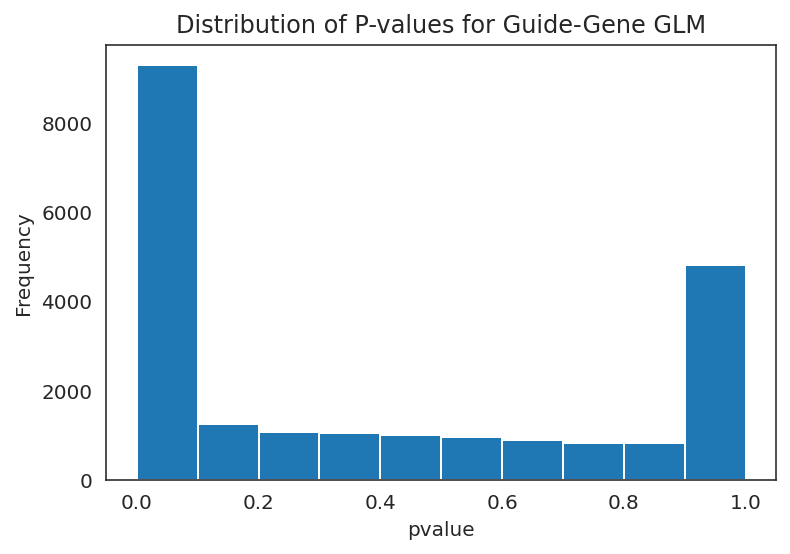

In [8]:
ax = plt.gca()
ax.set_title('Distribution of P-values for Guide-Gene GLM')
ax.set_xlabel('pvalue')
p_values.plot(kind='hist');